In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras import models
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
from tensorflow.keras.applications import ResNet101V2, ResNet50, ResNet101, ResNet152, ResNet50V2, DenseNet121, DenseNet201, ResNet152V2, VGG16, NASNetMobile, EfficientNetB3, VGG19, DenseNet169
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import pathlib
from keras.layers import Input, Dense, BatchNormalization, Dropout, GaussianNoise, GlobalAveragePooling2D
from keras import Sequential
from keras import regularizers

2022-12-08 14:21:01.739000: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
# spine_dir = '/home/leekwonwoo/Desktop/cervical fracture/'
# list_fracture = list(os.listdir(spine_dir+'fracture/'))
# list_normal = list(os.listdir(spine_dir+'normal/'))

In [3]:
# for img in list_fracture:
#     file_name = spine_dir + 'fracture/' + img
#     np_image = Image.open(file_name).convert('L')

#     np_image = np_image.resize((75,75), Image.ANTIALIAS)
#     np_image = np.array(np_image)
#     im = Image.fromarray(np_image)
#     im.save('/home/leekwonwoo/Desktop/clean2/fracture/'+img, format='JPEG', quality=100)

In [4]:
# for img in list_normal:
#     file_name = spine_dir + 'normal/' + img
#     np_image = Image.open(file_name).convert('L')

#     np_image = np_image.resize((75,75), Image.ANTIALIAS)
#     np_image = np.array(np_image)
#     im = Image.fromarray(np_image)
#     im.save('/home/leekwonwoo/Desktop/clean2/normal/'+img, format='JPEG', quality=100)

In [16]:
spine_dir = '/home/leekwonwoo/Desktop/clean2/'
spine_dir = pathlib.Path(spine_dir)

spine_image_dict = {
    'fracture': list(spine_dir.glob('fracture/*')),
    'normal': list(spine_dir.glob('normal/*'))
}
spine_lables_dict = {
    'fracture': 0,
    'normal': 1
}

In [17]:
X, y = [], []
for spine_name, images in spine_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        img = cv2.resize(img, (75,75))
        X.append(img)
        y.append(spine_lables_dict[spine_name])

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
X

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

In [8]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
def get_config(self):
    config=super().get_config().copy()
    return config

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.3) 

In [11]:
X_train1.dtype

dtype('uint8')

In [9]:


X_train1 = X_train1 / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

print(X_train1.shape, X_test.shape, y_train1.shape, y_test.shape, X_val.shape, y_val.shape)

(2646, 75, 75, 3) (420, 75, 75, 3) (2646,) (420,) (1134, 75, 75, 3) (1134,)


In [10]:
inputs = X_train1.astype('float32')
targets = y_train1

X_val = X_val.astype('float32')

X_test2 = X_test.astype('float32')
y_test2 = y_test

model_history=[]
cnn_models = [
#             ResNet50(include_top=True, weights=None, input_shape=(75, 75, 3), pooling='avg', classes=2)
#     ,
#             ResNet101(include_top=True, weights=None, input_shape=(75, 75, 3), pooling='avg', classes=2),
            # ResNet152(include_top=True, weights=None, input_shape=(150, 150, 3), pooling='avg', classes=3),
            # DenseNet121(include_top=True, weights=None, input_shape=(150, 150, 3), pooling='avg', classes=3),
            # DenseNet169(include_top=True, weights=None, input_shape=(150, 150, 3), pooling='avg', classes=3),
            DenseNet201(include_top=True, weights=None, input_shape=(75, 75, 3), pooling='avg', classes=2)
]

2022-12-07 17:42:23.918738: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-12-07 17:42:23.954288: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-07 17:42:23.954571: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6325GHz coreCount: 28 deviceMemorySize: 10.91GiB deviceMemoryBandwidth: 451.17GiB/s
2022-12-07 17:42:23.954588: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-12-07 17:42:23.956111: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-12-07 17:42:23.956140: I tensorflow/stream_executor/platf

In [11]:
model = Sequential()
model.add(cnn_models[0])
model.add(Dense(64, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

2022-12-07 17:42:26.549823: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-12-07 17:42:26.550394: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3600000000 Hz


Epoch 1/100


2022-12-07 17:42:56.891834: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-12-07 17:42:57.059708: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8100
2022-12-07 17:42:57.257629: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-12-07 17:42:57.396613: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


14/14 [==============================] - 42s 661ms/step - loss: 0.6864 - accuracy: 0.5701 - val_loss: 0.6764 - val_accuracy: 0.6605
Epoch 2/100
14/14 [==============================] - 3s 225ms/step - loss: 0.6141 - accuracy: 0.8143 - val_loss: 0.7243 - val_accuracy: 0.5273
Epoch 3/100
14/14 [==============================] - 3s 225ms/step - loss: 0.5131 - accuracy: 0.8911 - val_loss: 0.7367 - val_accuracy: 0.5414
Epoch 4/100
14/14 [==============================] - 3s 226ms/step - loss: 0.4218 - accuracy: 0.9028 - val_loss: 1.0568 - val_accuracy: 0.4903
Epoch 5/100
14/14 [==============================] - 3s 227ms/step - loss: 0.3497 - accuracy: 0.9072 - val_loss: 1.4460 - val_accuracy: 0.4903
Epoch 6/100
14/14 [==============================] - 3s 227ms/step - loss: 0.3635 - accuracy: 0.8922 - val_loss: 1.8079 - val_accuracy: 0.4982
Epoch 7/100
14/14 [==============================] - 3s 227ms/step - loss: 0.3269 - accuracy: 0.8928 - val_loss: 2.2098 - val_accuracy: 0.4903
Epoch 8/10

14/14 [==============================] - 3s 228ms/step - loss: 0.2556 - accuracy: 0.9101 - val_loss: 4.8664 - val_accuracy: 0.5115
Epoch 59/100
14/14 [==============================] - 3s 228ms/step - loss: 0.2747 - accuracy: 0.9086 - val_loss: 4.8471 - val_accuracy: 0.5168
Epoch 60/100
14/14 [==============================] - 3s 228ms/step - loss: 0.2621 - accuracy: 0.9078 - val_loss: 3.7731 - val_accuracy: 0.5653
Epoch 61/100
14/14 [==============================] - 3s 228ms/step - loss: 0.2707 - accuracy: 0.9047 - val_loss: 2.1006 - val_accuracy: 0.7240
Epoch 62/100
14/14 [==============================] - 3s 228ms/step - loss: 0.2591 - accuracy: 0.9129 - val_loss: 1.4839 - val_accuracy: 0.7460
Epoch 63/100
14/14 [==============================] - 3s 228ms/step - loss: 0.2731 - accuracy: 0.9103 - val_loss: 0.2789 - val_accuracy: 0.9021
Epoch 64/100
14/14 [==============================] - 3s 228ms/step - loss: 0.2743 - accuracy: 0.9028 - val_loss: 0.2669 - val_accuracy: 0.9056
Epoch

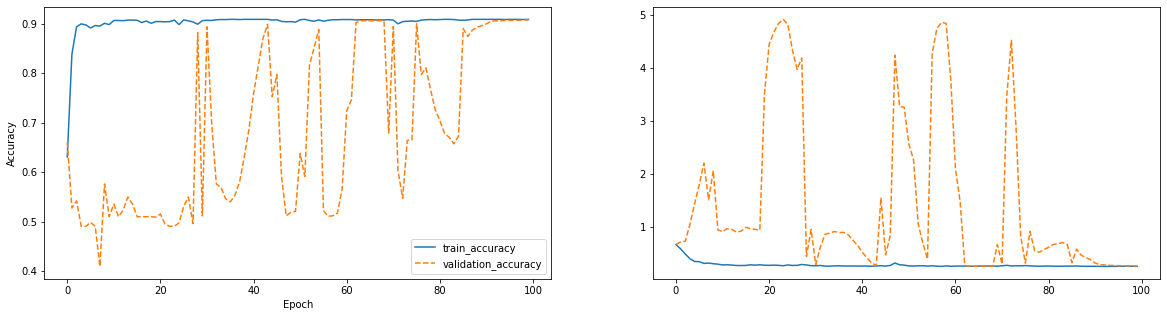

14/14 [==============================] - 0s 21ms/step - loss: 0.2312 - accuracy: 0.9214
[0.23115001618862152, 0.9214285612106323]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       201
           1       1.00      0.85      0.92       219

    accuracy                           0.92       420
   macro avg       0.93      0.92      0.92       420
weighted avg       0.93      0.92      0.92       420



In [12]:

# path = '/home/leekwonwoo/Desktop/result/'+str(model.name)+'_'+str(num)


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(inputs, targets,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=190
                    )
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], linestyle='solid', color='C0' )
plt.plot(history.history['val_accuracy'], linestyle='dashed', color='C1')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train_accuracy', 'validation_accuracy'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], linestyle='solid', color='C0')
plt.plot(history.history['val_loss'], linestyle='dashed', color='C1')
plt.show()
# plt.savefig(str(model.name)+'_'+str(num))
model_history.append(history.history)
y_pred = model.predict(X_test)
print(model.evaluate(X_test, y_test))
y_preds = model.predict(X_test)
y_preds = np.round(y_preds)
print("Classification Report: \n", classification_report(y_test, y_preds))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 2)                 18325826  
_________________________________________________________________
dense (Dense)                (None, 64)                192       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0

In [14]:
# model.save(path+'.h5')

In [15]:
# y_pred = model.predict(X_test)
# print(model.evaluate(X_test, y_test))
# y_preds = model.predict(X_test)
# y_preds = np.round(y_preds)
# print("Classification Report: \n", classification_report(y_test, y_preds))